In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

data = pd.read_csv('aaap.csv', index_col=['Date'], parse_dates=['Date'])
data.head(10)

Open   High    Low  Close   Volume  OpenInt
Date                                                    
2015-11-11  18.50  25.90  18.00  24.50  1584600        0
2015-11-12  24.25  27.12  22.50  25.00    83000        0
2015-11-13  25.47  26.20  24.55  25.26    67300        0
2015-11-16  25.01  26.19  24.13  25.02    16900        0
2015-11-17  24.46  25.51  24.38  24.62    25900        0
2015-11-18  24.62  26.31  24.06  25.00   111100        0
2015-11-19  24.85  26.00  24.71  25.90   113100        0
2015-11-20  26.00  27.01  25.10  25.20    60300        0
2015-11-23  25.60  25.60  25.00  25.15    59700        0
2015-11-24  25.21  27.00  25.09  25.62    56000        0

In [2]:
drop_cols = ['Volume', 'OpenInt']

data.drop(drop_cols, axis=1, inplace=True)
data.head()

Open   High    Low  Close
Date                                  
2015-11-11  18.50  25.90  18.00  24.50
2015-11-12  24.25  27.12  22.50  25.00
2015-11-13  25.47  26.20  24.55  25.26
2015-11-16  25.01  26.19  24.13  25.02
2015-11-17  24.46  25.51  24.38  24.62

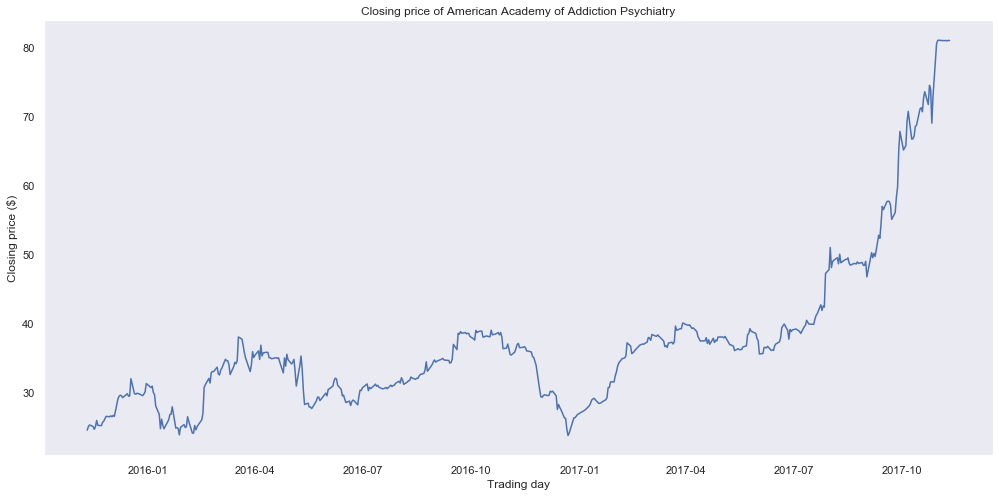

In [4]:
plt.figure(figsize=(17, 8))
plt.plot(data.Close)
plt.title('Closing price of American Academy of Addiction Psychiatry')
plt.ylabel('Closing price ($)')
plt.xlabel('Trading day')
plt.grid(False)
plt.show()

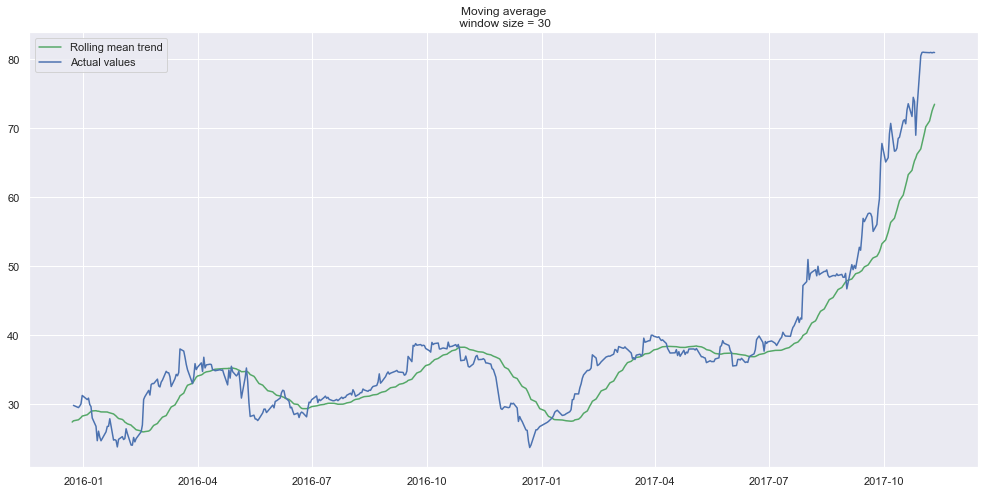

In [5]:
def plot_moving_average(series, window, plot_intervals=False, scale=1.96):
    rolling_mean = series.rolling(window=window).mean()
 
    plt.figure(figsize=(17,8))
    plt.title('Moving average\n window size = {}'.format(window))
    plt.plot(rolling_mean, 'g', label='Rolling mean trend')

    #Plot confidence intervals for smoothed values
    if plot_intervals:
        mae = mean_absolute_error(series[window:], rolling_mean[window:])
        deviation = np.std(series[window:] - rolling_mean[window:])
        lower_bound = rolling_mean - (mae + scale * deviation)
        upper_bound = rolling_mean + (mae + scale * deviation)
        plt.plot(upper_bound, 'r--', label='Upper bound / Lower bound')
        plt.plot(lower_bound, 'r--')

    plt.plot(series[window:], label='Actual values')
    plt.legend(loc='best')
    plt.grid(True)

#Smooth by the previous 5 days (by week)
plot_moving_average(data.Close, 5)

#Smooth by the previous month (30 days)
plot_moving_average(data.Close, 30)

#Smooth by previous quarter (90 days)
#plot_moving_average(data.Close, 90, plot_intervals=True)

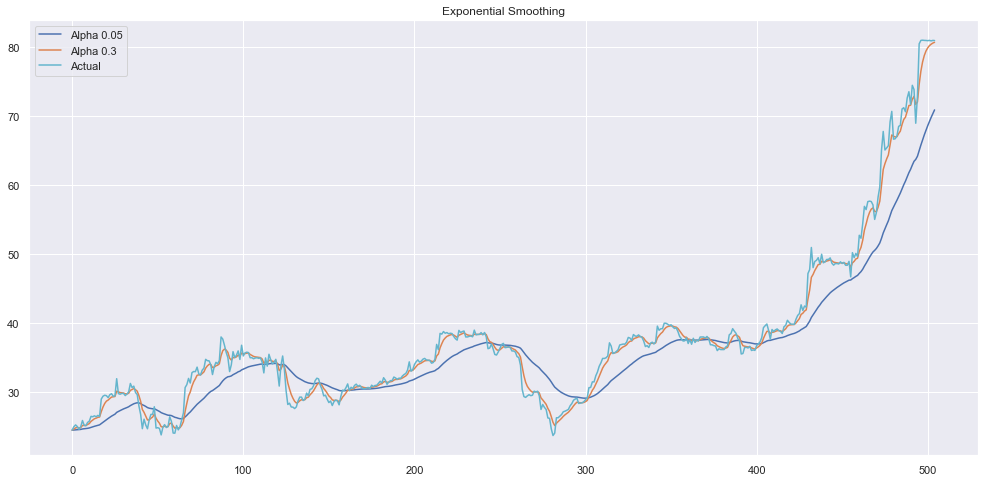

In [6]:
def exponential_smoothing(series, alpha):
    result = [series[0]] # first value is same as series
    for n in range(1, len(series)):
        result.append(alpha * series[n] + (1 - alpha) * result[n-1])
    return result

def plot_exponential_smoothing(series, alphas):
    plt.figure(figsize=(17, 8))
    for alpha in alphas:
        plt.plot(exponential_smoothing(series, alpha), label="Alpha {}".format(alpha))
    plt.plot(series.values, "c", label = "Actual")
    plt.legend(loc="best")
    plt.axis('tight')
    plt.title("Exponential Smoothing")
    plt.grid(True);
        
plot_exponential_smoothing(data.Close, [0.05, 0.3])

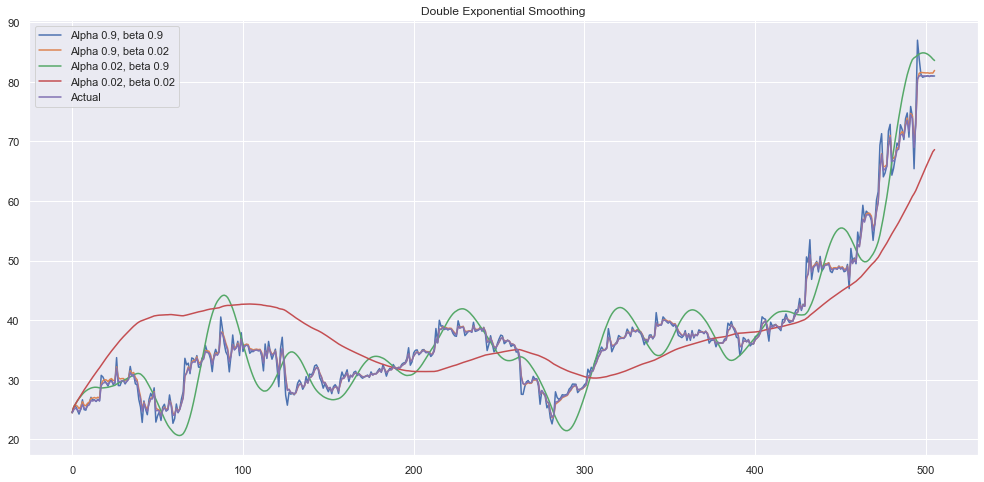

In [7]:
def double_exponential_smoothing(series, alpha, beta):
    result = [series[0]]
    
    for n in range(1, len(series)+1):
        if n == 1:
            level, trend = series[0], series[1] - series[0]
        if n >= len(series): # forecasting
            value = result[-1]
        else:
            value = series[n]
        
        last_level, level = level, alpha * value + (1 - alpha) * (level + trend)
        trend = beta * (level - last_level) + (1 - beta) * trend
        result.append(level + trend)
    return result

def plot_double_exponential_smoothing(series, alphas, betas):
    plt.figure(figsize=(17, 8))
    for alpha in alphas:
        for beta in betas:
            plt.plot(double_exponential_smoothing(series, alpha, beta), label="Alpha {}, beta {}".format(alpha, beta))
    plt.plot(series.values, label = "Actual")
    plt.legend(loc="best")
    plt.axis('tight')
    plt.title("Double Exponential Smoothing")
    plt.grid(True)

plot_double_exponential_smoothing(data.Close, alphas=[0.9, 0.02], betas=[0.9, 0.02])

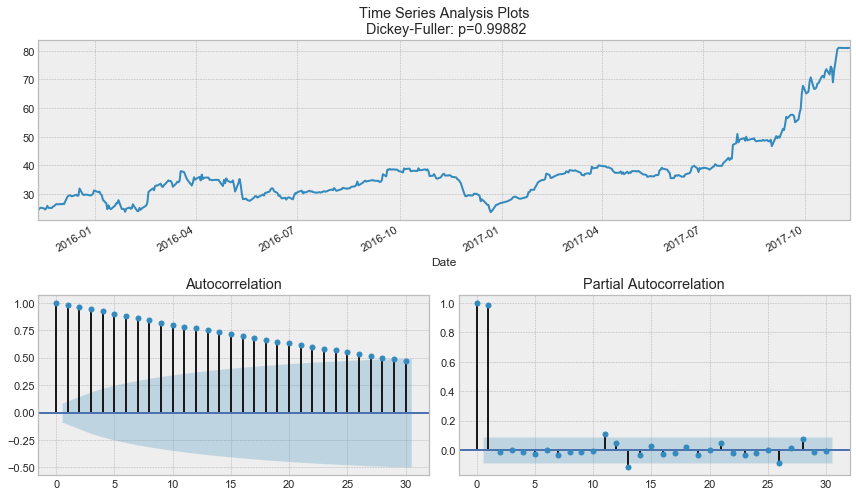

In [8]:
import statsmodels.api as sm
import statsmodels as smt

def tsplot(y, lags=None, figsize=(12, 7), syle='bmh'):
    
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
        
    with plt.style.context(style='bmh'):
        fig = plt.figure(figsize=figsize)
        layout = (2,2)
        ts_ax = plt.subplot2grid(layout, (0,0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1,0))
        pacf_ax = plt.subplot2grid(layout, (1,1))
        
        y.plot(ax=ts_ax)
        p_value = sm.tsa.stattools.adfuller(y)[1]
        ts_ax.set_title('Time Series Analysis Plots\n Dickey-Fuller: p={0:.5f}'.format(p_value))
        smt.graphics.tsaplots.plot_acf(y, lags=lags, ax=acf_ax)
        smt.graphics.tsaplots.plot_pacf(y, lags=lags, ax=pacf_ax)
        plt.tight_layout()
        
tsplot(data.Close, lags=30)

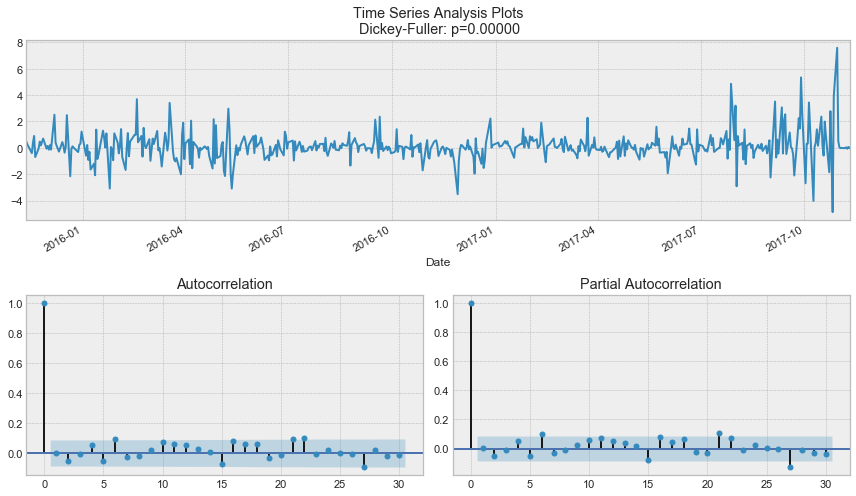

In [9]:
# Take the first difference to remove to make the process stationary
data_diff = data.Close - data.Close.shift(1)

tsplot(data_diff[1:], lags=30)

In [64]:
import pandas as pd
st2 = pd.read_csv('aaap.csv', parse_dates=[0])

In [65]:
st2.head()

Date   Open   High    Low  Close   Volume  OpenInt
0 2015-11-11  18.50  25.90  18.00  24.50  1584600        0
1 2015-11-12  24.25  27.12  22.50  25.00    83000        0
2 2015-11-13  25.47  26.20  24.55  25.26    67300        0
3 2015-11-16  25.01  26.19  24.13  25.02    16900        0
4 2015-11-17  24.46  25.51  24.38  24.62    25900        0

In [66]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [67]:
st2.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'OpenInt'], dtype='object')

In [68]:
# Need to remove NA
# Regression - Try to predict Mean_Humidity (y) from non humidity columns (X)
# Get training set (X_train)
def valid(col):
    return 'Close' not in col and 'Date' not in col and col != 'OpenInt_0'
st2 = st2.dropna()
X = st2[[x for x in st2.columns if valid(x)]].iloc[:-50]
y = st2.Close.shift(-50).dropna()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [69]:
X.T

0         1         2         3         4          5    \
Open          18.5     24.25     25.47     25.01     24.46      24.62   
High          25.9     27.12     26.20     26.19     25.51      26.31   
Low           18.0     22.50     24.55     24.13     24.38      24.06   
Volume   1584600.0  83000.00  67300.00  16900.00  25900.00  111100.00   
OpenInt        0.0      0.00      0.00      0.00      0.00       0.00   

               6         7        8         9    ...       445        446  \
Open         24.85     26.00     25.6     25.21  ...     49.07     46.675   
High         26.00     27.01     25.6     27.00  ...     49.54     48.790   
Low          24.71     25.10     25.0     25.09  ...     47.80     45.310   
Volume   113100.00  60300.00  59700.0  56000.00  ...  48391.00  67617.000   
OpenInt       0.00      0.00      0.0      0.00  ...      0.00      0.000   

              447         448       449       450       451       452  \
Open        47.83     48.9400     48.26     49.33     48.36     48.50   
High        48.98     49.0500     49.05     49.60     49.10     49.05   
Low         47.83     48.5359     48.09     48.43     48.36     47.76   
Volume   38553.00  24010.0000  25636.00  45301.00  55304.00  49896.00   
OpenInt      0.00      0.0000      0.00      0.00      0.00      0.00   

               453       454  
Open        48.550     48.00  
High        48.785     49.00  
Low         48.070     44.57  
Volume   27735.000  38235.00  
OpenInt      0.000      0.00  

[5 rows x 455 columns]

In [70]:
# Create a model 
rf_model = RandomForestRegressor()

# Train the model
rf_model.fit(X_train, y_train)

C:\Users\prana\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [71]:
# Get R2 measure (indicator of accuracy 1 is perfect 0 is horrible)
rf_model.score(X_test, y_test)

0.7984778637401897

In [72]:
type(y_test)

pandas.core.series.Series

In [73]:
pd.concat([pd.Series(rf_model.predict(X_test)), y_test.reset_index(
drop=True)], axis=1)

0  Close
0    35.3820  39.24
1    34.7790  36.80
2    37.0530  49.47
3    42.1760  52.32
4    34.2455  34.79
..       ...    ...
109  45.4030  42.67
110  33.8845  24.88
111  33.5260  35.02
112  36.6590  38.01
113  33.2050  31.34

[114 rows x 2 columns]

In [63]:
sorted(zip(X.columns, rf_model.feature_importances_),
        key=lambda x: x[1], reverse=True)

[('High', 0.4831354120677965),
 ('Low', 0.37986316711412765),
 ('Open', 0.07833508802979439),
 ('Volume', 0.0586663327882815)]